In [66]:
from time import sleep
from random import random,seed
from math import inf
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

seed(5)

f1 = 22
f2 = 110
n_cells = 10_000
timesteps = 5_000
initial_prob = 0.5
mlambda = 0.2

ON_COLOR = (0, 0, 255)
OFF_COLOR = (255, 255, 255)

def local_f(rule, x, y, z):
    return (rule >> (x * 4 + y * 2 + z) & 1)

def f(state, oldstate):
    for cell_num in range(n_cells):
        x = oldstate[(cell_num - 1) % n_cells]
        y = oldstate[cell_num % n_cells]
        z = oldstate[(cell_num + 1) % n_cells]

        if random() > mlambda:
            state[cell_num] = local_f(f1, x, y, z)
        else:
            state[cell_num] = local_f(f2, x, y, z)

def state_density(state):
    return sum(state) / n_cells

def state_kink_density(state):
    return sum(
        map(lambda neighbours: 1 if neighbours[0] != neighbours[1] else 0,
            zip(state, state[1::]))) / n_cells
    
def simulate():
    state = list(map(lambda x: random() < initial_prob, range(n_cells)))
    state_old = state.copy()
    for i in tqdm(range(timesteps), f"λ = {mlambda}"):
        f(state, state_old)
        state, state_old = state_old, state
    
    return state_old
    
def calc_densities():
    λ = 0 # in percent
    
    densities = []
    while λ <= 100:
        global mlambda
        mlambda = λ / 100.0
        state = simulate()
        densities.append((mlambda, state_density(state), state_kink_density(state)))
        
        if (λ < 5 or λ > 95):
            λ += 1
        else:
            λ += 5
    return densities

In [ ]:
md = calc_densities()

λ = 0.45:  34%|███▍      | 1706/5000 [00:11<00:21, 153.17it/s]

In [65]:
md

[(0.0, 0.3571, 0.3318),
 (0.01, 0.3435, 0.3346),
 (0.02, 0.349, 0.3385),
 (0.03, 0.3433, 0.3442),
 (0.04, 0.3429, 0.3368),
 (0.05, 0.3521, 0.3474),
 (0.1, 0.3195, 0.3405),
 (0.15, 0.2983, 0.329),
 (0.2, 0.2575, 0.2988),
 (0.25, 0.1655, 0.2038),
 (0.3, 0.0, 0.0),
 (0.35, 0.0, 0.0),
 (0.4, 0.0, 0.0),
 (0.45, 0.0, 0.0),
 (0.5, 0.0, 0.0),
 (0.55, 0.0, 0.0),
 (0.6, 0.0, 0.0),
 (0.65, 0.0, 0.0),
 (0.7, 0.0, 0.0),
 (0.75, 0.0, 0.0),
 (0.8, 0.0, 0.0),
 (0.85, 0.0, 0.0),
 (0.9, 0.0, 0.0),
 (0.95, 0.0, 0.0),
 (1.0, 0.0, 0.0)]

<IPython.core.display.Javascript object>


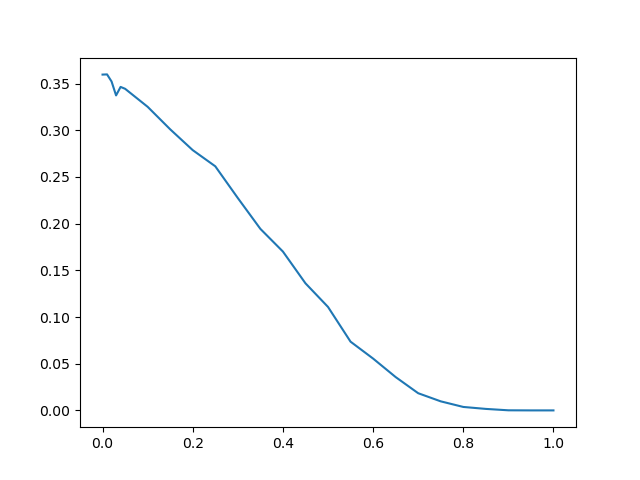

<IPython.core.display.Javascript object>


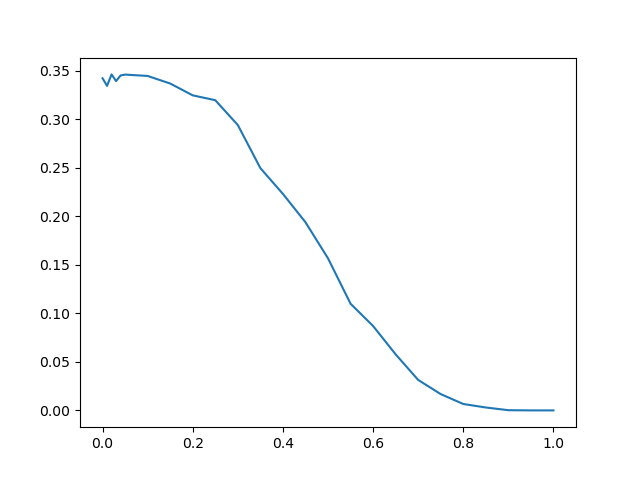

In [62]:
%matplotlib notebook
plt.figure('density of diagonal (22-0)')
plt.plot(list(map(lambda x:x[0], md)), list(map(lambda x:x[1],md)))
plt.show()

plt.figure('kink density of diagonal (22-0)')
plt.plot(list(map(lambda x:x[0], md)), list(map(lambda x:x[2],md)))
plt.show()